In [2]:
import pandas as pd
import nltk

In [2]:
df=pd.read_csv("ideed_Eng.csv", index_col=0)

In [3]:
df

titre  \
entreprise                                                                                    
The Standard                                                          Senior Data Scientist   
dunnhumby                                                     Senior Applied Data Scientist   
HEPCO, Inc.                                                           Senior Data Scientist   
One Concern                                                Data Scientist, Machine Learning   
Grammarly, Inc.                                                              Data Scientist   
...                                                                                     ...   
GETRESOURCE                                          Jr./Entry Level Middleware consultants   
Clark, Richardson and Biskup Consulting Enginee...  Entry Level Process Simulation Engineer   
Logos Infotech Inc                                              Entry level Devops Engineer   
SDSN Association                                                    SDSN USA Analyst Intern   
DataLab USA                                                   Data Scientist / Statistician   

                                                                                          description  
entreprise                                                                                             
The Standard                                        At The Standard, you’ll join a team focused on...  
dunnhumby                                           dunnhumby is the world’s leading customer scie...  
HEPCO, Inc.                                         SENIOR DATA SCIENTIST  HEPCO, Inc., is seeking...  
One Concern                                         One Concern is a startup which specializes in ...  
Grammarly, Inc.                                     The opportunity  Grammarly empowers people to ...  
...                                                                                               ...  
GETRESOURCE                                         Job Requirements  This requirement is for a ca...  
Clark, Richardson and Biskup Consulting Enginee...  Position Summary The Entry-Level Process Simul...  
Logos Infotech Inc                                  Company Description  Our company is a leading ...  
SDSN Association                                    Organization Background  The SDSN USA endeavor...  
DataLab USA                                         Key responsibilities/duties include: Build, im...  

[471 rows x 2 columns]

# g

In [254]:
import spacy
from spacy.lang.en import English
from nltk.corpus import stopwords
import spacy
from spacy import displacy
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nlp = spacy.load('en_core_web_sm')

In [92]:
df=pd.read_csv("ideed_Eng.csv", index_col=0)

In [93]:
len(df)

471

In [222]:
alphabets = '([A-Za-z])'
prefixes = '(Mr|Mrs|Ms|Dr|Pr)[.]'
suffixes = '(Inc|Ltd|Jr|Sr|Co)'
acronyms = '(?:[a-zA-Z]\.){2,}'
websites = '[.](com|net|org|io|gov|fr|uk|usa|esp)'
starters = '(Mr\.|Mrs\.|Ms\.|Dr\.|Pr\.|However|But|The\s|This\s|That\s|Those\s|Their\s|So|Although|Our\s|He\s|She\s|They\s|We\s|A\s)'

In [223]:
lemmatizer = WordNetLemmatizer()

def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return ' '.join(res_words)

In [224]:
def split_into_sentences(text):
  text = text.replace('\n', ' ')
  text = ' '.join([word for word in text.split(' ') if word != ''])
  text = text.replace('\uf0b7', '').replace('\x0c', '').replace('\uf054', '').replace('•', '').replace('…', '').replace('“', '').replace('”', '')
  text = re.sub('\([a-zA-Z]{1}\)', '', text)
  text = re.sub(prefixes, '\\1<prd>', text)
  text = re.sub(suffixes + '[.]', '\\1<prd>', text)
  text = re.sub('[.]' + alphabets, '\\1<prd>', text)
  text = re.sub('([1-9a-zA-Z])[.]([1-9a-zA-Z])', '\\1<prd>\\2', text)
  text = re.sub(alphabets + '[.]' + alphabets, '\\1<prd>\\2', text)
  text = re.sub(alphabets + '[.]' + alphabets + '[.]' + alphabets, '\\1<prd>\\2<prd>\\3', text)
  text = re.sub('\.{2,}', '<prd>', text)
  text = re.sub(websites, '<prd>\\1', text)
  text = re.sub(starters, '<stop>\\1', text)
  for acr in re.findall(acronyms, text): text = text.replace(acr, '<prd>'.join(acr.split('.')))
  text = text.replace('.', '.<stop>').replace('!', '!<stop>').replace('?', '?<stop>').replace(';', ';<stop>')
  text = text.replace('<prd>', '.')

  sentences = text.split('<stop>')
  sentences = [sent.strip() for sent in sentences]
  sentences = [sent for sent in sentences if sent not in ['', ' ']]
  sentences = [sent for sent in sentences if len(sent) > 1]
  sentences = list(map(lambda sent: ' '.join([word for word in sent.split() if word.lower() not in stopwords.words('english')]), sentences))

  sentences = [lemmatize_sentence(sent) for sent in sentences]

  return sentences

In [225]:
corpus=[]
for i in range(len(df)):
    description_offre = re.sub("[^a-zA-Z]", " " , df['description'].iloc[i])
    corpus.append(description_offre)

In [226]:
len(corpus)

471

In [227]:
corpus[0]

'At The Standard  you ll join a team focused on putting our customers first   Our continued success is driven by a high performance culture  We re looking for people who are collaborative  accountable  creative  agile and are driven by a passion for doing what s right   across the company and in our local communities   We offer a caring culture where you can make a real difference  every day   Ready to reach your highest potential  Let s work together  Location  Portland  Oregon  however for the right candidate we would consider  Remote work  or to work out of one of our other offices in  Hillsboro  OR or White Plains  NY  Your Responsibilities As an analytical problem solver define business problems in an analytics framework and define business based KPI s to monitor and measure the business impact  Implement industrial best practices in data science product organizations  defining objectives  key results  and approach  In short  develop product oriented execution approaches  As an in

In [228]:
corpus2=[]
for i in range(len(corpus)):
    corpus2.extend(split_into_sentences(corpus[i]))

In [229]:
corpus2[3]

'look people collaborative accountable creative agile drive passion right across company local community'

In [230]:
len(corpus2)

3542

In [231]:
# list of lists
corpus3=[]
for i in range(len(corpus)):
    corpus3.append(split_into_sentences(corpus[i]))

In [232]:
corpus3[0]

['',
 'Standard join team focus put customer first',
 'continued success driven high performance culture',
 'look people collaborative accountable creative agile drive passion right across company local community',
 'offer care culture make real difference every day Ready reach high potential Let work together Location Portland Oregon however right candidate would consider Remote work work one office Hillsboro White Plains NY Responsibilities analytical problem solver define business problem analytics framework define business base KPI monitor measure business impact Implement industrial best practice data science product organization define objective key result approach short develop product orient execution approach internal consultant partner stakeholder leader understand business business challenge identify trend pattern develop recommendation guide work data engineer domain owner produce require data available Develop hypothesis convert right analytical problem solution communicat

In [233]:
len(corpus3)

471

In [237]:
#M Put corpus2 in data frame 
df2 = pd.DataFrame(data=corpus2, columns={"Corpus"})

In [241]:
df2.head()

Corpus
0                                                   
1        Standard join team focus put customer first
2  continued success driven high performance culture
3  look people collaborative accountable creative...
4  offer care culture make real difference every ...

In [436]:
# Dictionnaire
dinct = {'Intitule_du_poste': ('looking', 'look', 'looks','position','join','help','senior','scientist','Analytics','Analyst','lead',), 
          'Experience': ('years', 'year','skills',' experience'),
          'Missions': ('help', 'create', 'use','project','Developing','develop','maintain','Work','research','Collect','execute','Design','deliver','analyze','Clean','keep','support','edit','report'),
          'Formation': ('Knowledge','python','scala','pandas','numpy','scikit','scikit learn','spacy','nlp','machine learn','machine learning','reinforcement learning','deep learning','keras','pytorch','tensorflow','Matplotlib','Sympy','nltk','Natural Language Toolkit','Django','Flask','BeautifulSoup','turi sframe','SQL','no sql','Tableau ','power bi', 'data visualization platform','Excel','Master’s degree in Statistics','Bachelor','communication','Statistics','mathematics')   
          }

def fetchFunction(x):
    for key, values in dinct.items():
        for value in values:
            if value in x.lower():
                return key
    else:
        return np.nan

df2['Entity'] = df2['Corpus'].apply(fetchFunction)

In [437]:
df2

Corpus             Entity  \
0                                                                      NaN   
1           Standard join team focus put customer first  Intitule_du_poste   
2     continued success driven high performance culture                NaN   
3     look people collaborative accountable creative...  Intitule_du_poste   
4     offer care culture make real difference every ...  Intitule_du_poste   
...                                                 ...                ...   
3537                         equal opportunity employer                NaN   
3538  particularly encourage marginalized identity a...                NaN   
3539  Analyst Internship usa unsdsn org Applications...                NaN   
3540  Key responsibility duty include Build implemen...         Experience   
3541  equal opportunity employer qualify applicant r...                NaN   

      target  
0          0  
1          1  
2          0  
3          1  
4          1  
...      ...  
3537       0  
3538       0  
3539       0  
3540       2  
3541       0  

[3542 rows x 3 columns]

In [290]:
def getLocation(doc):
    location=[]
    for ent in doc.ents:
        if (not ent.text in location and ent.label_ == "LOC"):            
            location.append(ent.text)
            return location
        
def getOrganisation(doc):
    organisation=[]
    for ent in doc.ents:        
        if (not ent.text in organisation and ent.label_ == "ORG"): 
            organisation.append(ent.text)
            return organisation

In [291]:
df2['Entity']=df2.apply(lambda x:getLocation(nlp(x['Corpus'])),axis=1)
#df2['Entity']=df2.apply(lambda x:getOrganisation(nlp(x['Corpus'])),axis=1)

In [293]:
df2

Corpus Entity
0                                                         None
1           Standard join team focus put customer first   None
2     continued success driven high performance culture   None
3     look people collaborative accountable creative...   None
4     offer care culture make real difference every ...   None
...                                                 ...    ...
3537                         equal opportunity employer   None
3538  particularly encourage marginalized identity a...   None
3539  Analyst Internship usa unsdsn org Applications...   None
3540  Key responsibility duty include Build implemen...   None
3541  equal opportunity employer qualify applicant r...   None

[3542 rows x 2 columns]

In [438]:
df2.to_csv('Takriz.csv')

## Crétion target :

In [309]:
df2['target'] = 0 
df2.target[df2.Entity =='Intitule_du_poste']=1
df2.target[df2.Entity =='Experience']=2
df2.target[df2.Entity =='Missions']=3
df2.target[df2.Entity =='Formation']=4

In [311]:
df2

Corpus             Entity  \
0                                                                      NaN   
1           Standard join team focus put customer first  Intitule_du_poste   
2     continued success driven high performance culture                NaN   
3     look people collaborative accountable creative...  Intitule_du_poste   
4     offer care culture make real difference every ...  Intitule_du_poste   
...                                                 ...                ...   
3537                         equal opportunity employer                NaN   
3538  particularly encourage marginalized identity a...                NaN   
3539  Analyst Internship usa unsdsn org Applications...                NaN   
3540  Key responsibility duty include Build implemen...         Experience   
3541  equal opportunity employer qualify applicant r...                NaN   

      target  
0          0  
1          1  
2          0  
3          1  
4          1  
...      ...  
3537       0  
3538       0  
3539       0  
3540       2  
3541       0  

[3542 rows x 3 columns]

In [330]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

df2Vectorized=cv.fit_transform(df2['Corpus']).toarray()

X=pd.DataFrame(data=df2Vectorized,columns=cv.get_feature_names())

In [331]:
X

aa  aachen  aag  aap  aaps  aarontilley  ab  abap  abbott  abbv  ...  \
0      0       0    0    0     0            0   0     0       0     0  ...   
1      0       0    0    0     0            0   0     0       0     0  ...   
2      0       0    0    0     0            0   0     0       0     0  ...   
3      0       0    0    0     0            0   0     0       0     0  ...   
4      0       0    0    0     0            0   0     0       0     0  ...   
...   ..     ...  ...  ...   ...          ...  ..   ...     ...   ...  ...   
3537   0       0    0    0     0            0   0     0       0     0  ...   
3538   0       0    0    0     0            0   0     0       0     0  ...   
3539   0       0    0    0     0            0   0     0       0     0  ...   
3540   0       0    0    0     0            0   0     0       0     0  ...   
3541   0       0    0    0     0            0   0     0       0     0  ...   

      zepellin  zero  zinfi  zip  zone  zoox  zoro  zr  zuckerberg  zurich  
0            0     0      0    0     0     0     0   0           0       0  
1            0     0      0    0     0     0     0   0           0       0  
2            0     0      0    0     0     0     0   0           0       0  
3            0     0      0    0     0     0     0   0           0       0  
4            0     0      0    0     0     0     0   0           0       0  
...        ...   ...    ...  ...   ...   ...   ...  ..         ...     ...  
3537         0     0      0    0     0     0     0   0           0       0  
3538         0     0      0    0     0     0     0   0           0       0  
3539         0     0      0    0     0     0     0   0           0       0  
3540         0     0      0    0     0     0     0   0           0       0  
3541         0     0      0    0     0     0     0   0           0       0  

[3542 rows x 8575 columns]

In [338]:
y=pd.DataFrame(data=df2['target'].values, columns=['Target'])
y

Target
0          0
1          1
2          0
3          1
4          1
...      ...
3537       0
3538       0
3539       0
3540       2
3541       0

[3542 rows x 1 columns]

In [341]:
df_Final = pd.concat([X, y], axis=1)
df_Final

aa  aachen  aag  aap  aaps  aarontilley  ab  abap  abbott  abbv  ...  \
0      0       0    0    0     0            0   0     0       0     0  ...   
1      0       0    0    0     0            0   0     0       0     0  ...   
2      0       0    0    0     0            0   0     0       0     0  ...   
3      0       0    0    0     0            0   0     0       0     0  ...   
4      0       0    0    0     0            0   0     0       0     0  ...   
...   ..     ...  ...  ...   ...          ...  ..   ...     ...   ...  ...   
3537   0       0    0    0     0            0   0     0       0     0  ...   
3538   0       0    0    0     0            0   0     0       0     0  ...   
3539   0       0    0    0     0            0   0     0       0     0  ...   
3540   0       0    0    0     0            0   0     0       0     0  ...   
3541   0       0    0    0     0            0   0     0       0     0  ...   

      zero  zinfi  zip  zone  zoox  zoro  zr  zuckerberg  zurich  Target  
0        0      0    0     0     0     0   0           0       0       0  
1        0      0    0     0     0     0   0           0       0       1  
2        0      0    0     0     0     0   0           0       0       0  
3        0      0    0     0     0     0   0           0       0       1  
4        0      0    0     0     0     0   0           0       0       1  
...    ...    ...  ...   ...   ...   ...  ..         ...     ...     ...  
3537     0      0    0     0     0     0   0           0       0       0  
3538     0      0    0     0     0     0   0           0       0       0  
3539     0      0    0     0     0     0   0           0       0       0  
3540     0      0    0     0     0     0   0           0       0       2  
3541     0      0    0     0     0     0   0           0       0       0  

[3542 rows x 8576 columns]

In [342]:
# Naive Bayes
# Support Vector Machines (SVM)
# Random forest 

# Modelisation

In [359]:
X= df_Final.iloc[:,0:-1]
y = df_Final.iloc[:,-1]

In [360]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [364]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2833, 8575)
(709, 8575)
(2833,)
(709,)


## 1.Modélisation avec random forest

In [367]:
# Modelisation avec random forest
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
%timeit model.fit(X_train,y_train)

17.6 s ± 2.9 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [368]:
model
# On peut acceler le calcule avec n_jobs=-1 utiliset tous les processuers disponibles dans le calcule  
# Par défault none utilise 1 processur

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [370]:
model.predict_proba(X_test) # prédire la probabilité

array([[0.18, 0.14, 0.68],
       [0.81, 0.19, 0.  ],
       [0.86, 0.13, 0.01],
       ...,
       [0.92, 0.01, 0.07],
       [0.94, 0.06, 0.  ],
       [0.06, 0.87, 0.07]])

In [371]:
# l'utilité dans la confusion matrix
y_pred=model.predict(X_test)

In [374]:
# Evaluation du modele :
model.score(X_train,y_train)

1.0

In [372]:
# Evaluation du modele : 
model.score(X_test,y_test)

0.9280677009873061

In [373]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[326,  10,   2],
       [  3, 284,   1],
       [  9,  26,  48]], dtype=int64)

## 2.Amelioration du modele

In [378]:
# L'importance de chaque colonne 
model.feature_importances_

array([1.10796876e-05, 4.64817519e-05, 0.00000000e+00, ...,
       1.70791857e-05, 0.00000000e+00, 3.20301824e-05])

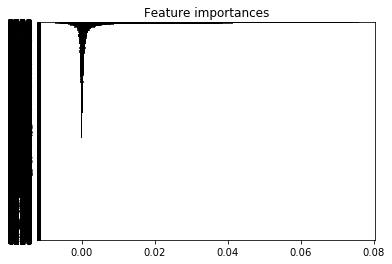

In [382]:
# Plot the feature importances of the forest
# Pour comprendre cette classifcation
import matplotlib.pyplot as plt

importances=model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")

plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

# 3. Test modele

In [408]:
phrase_test= "Organization Background The SDSN USA endeavors to build pathways for the achievement of the UN Sustainable Development Goals (SDGs) in the United States by mobilizing research, outreach, and collective action. This includes: facilitating the development of solutions to U.S. sustainability challenges; building sophisticated, practical systems for measuring progress and connecting with stakeholders who will utilize them; facilitating public awareness, education, and engagement; and linking these efforts with policymakers and community leaders throughout the U.S. to result in lasting change. Project Background SDSN USA has released a number of indices investigating the progress of US states and cities towards achieving the Sustainable Development Goals. This internship would primarily support the data work that goes into designing, analyzing, and developing those indices. Some SDSN USA projects include a US State Index on the SDGs and America’s Goals for 2030, localization of the SDGs in collaboration with Future Now. Position Responsibilities The Analyst Intern will be expected to work up to 29 hours/week, and will be responsible for: Supporting the preparation of the data for the index, which will require desk-based research, developing and maintaining metadata, researching and downloading data Identifying experts in relevant fields for advice and review Development and research of relevant indicators and/or datasets Cleaning and preparing the data Keeping the team informed about relevant data definitions and their implications for inclusion, exclusion, or comparison with other indices Drafting, editing and/or reviewing written material related to the index Managing and troubleshooting any issues related to the collection or distribution of databases Presenting findings and participating in research review during research meetings Supporting other SDSN USA activities, depending on interests and availability Skills The position is open to both undergraduate and graduate students with the requisite skills Comfort with Excel, including downloading excel files, reading and basic arranging of quantitative data within Excel required Experience with Stata, required Highly organized and responsive, ability to work independently Proactive communication skills Familiarity with the SDGs, sustainability, the Leave No One Behind Agenda, and other relevant disciplines, preferred but not required Unfortunately, SDSN is not able to provide work visas for this internship Compensation Duration: 10 weeks, beginning ASAP, with the possibility for continuation Compensation: $15-18/hour, depending on experience (up to 29 hours/week) Location: Remote SDSN USA is an equal opportunity employer. We particularly encourage those with marginalized identities to apply. How to Apply "

In [411]:
list_phrase_test=split_into_sentences(phrase_test)

In [412]:
list_phrase_test

['Organization Background',
 'SDSN US',
 'endeavor build pathway achievement UN Sustainable Development Goals ( SDGs ) United States mobilize research , outreach , collective action .',
 'include : facilitating development solution US..',
 'sustainability challenge ;',
 'building sophisticate , practical system measure progress connect stakeholder utilize them ;',
 'facilitate public awareness , education , engagement ;',
 'link effort policymakers community leader throughout US..',
 'result last change .',
 'Project Background SDSN US',
 'release number index investigate progress US state city towards achieve Sustainable Development Goals .',
 'internship would primarily support data work go design , analyze , develop index .',
 'SDSN US',
 'project include US State Index SDGs America ’ s Goals 2030 , localization SDGs collaboration Future Now .',
 'Position Responsibilities',
 'Analyst Intern expect work 29 hours/week , responsible for : Supporting preparation data index , require de

In [415]:
len(list_phrase_test)

21

In [413]:
# l phrase nhotouha dans une liste
x_phrase_test= cv.transform(list_phrase_test)

In [406]:
x_phrase_test

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [414]:
model.predict(x_phrase_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0],
      dtype=int64)

In [ ]:
# Test 2 

In [418]:
df_hosni=pd.read_csv("sentences.csv", sep=';',index_col=0)

In [425]:
list_hosni=df.values.tolist()

In [435]:
list_hosni

 and strong work ethic. Strong ability to learn quickly. Able to integrate easily into multidisciplinary teams.   We Offer  The best environment to develop talent  We offer you the possibility to join a firm that provides all you need to develop your talent to the fullest: Working in the highest-profile consulting projects in the industry, for the largest companies, leaders of their respective markets, alongside top industry management as they face challenges at the national and global level, as part of an extraordinary team of professionals whose values and corporate culture are a benchmark for the industry  Ongoing training plan, with approximately 10% of business turnover spent in training  Specialist knowledge courses, external expert courses, professional skills courses, and language courses.  Last year our staff as a whole received over 250,000 hours of training, spanning more than 575 courses.  Clearly defined career plan  Internal promotion based solely on merit.  Partnership-b

In [434]:
x_phrase_test2= cv.transform(list_hosni)

AttributeError: 'list' object has no attribute 'lower'

In [429]:
x_phrase_test= cv.transform(list_hosni)

AttributeError: 'list' object has no attribute 'lower'

In [428]:
x_phrase_test= cv.transform(list_hosni)

AttributeError: 'list' object has no attribute 'lower'

In [427]:
list_hosni

 and strong work ethic. Strong ability to learn quickly. Able to integrate easily into multidisciplinary teams.   We Offer  The best environment to develop talent  We offer you the possibility to join a firm that provides all you need to develop your talent to the fullest: Working in the highest-profile consulting projects in the industry, for the largest companies, leaders of their respective markets, alongside top industry management as they face challenges at the national and global level, as part of an extraordinary team of professionals whose values and corporate culture are a benchmark for the industry  Ongoing training plan, with approximately 10% of business turnover spent in training  Specialist knowledge courses, external expert courses, professional skills courses, and language courses.  Last year our staff as a whole received over 250,000 hours of training, spanning more than 575 courses.  Clearly defined career plan  Internal promotion based solely on merit.  Partnership-b

<hr>

In [114]:
# REBAI
corpus=[]
for i in range(len(df)):
    description_offre = re.sub("[^a-zA-Z,.]", " " , df['description'].iloc[i])
    description_offre= description_offre.lower()
    description_offre= description_offre.split()
    ps = PorterStemmer()
    description_offre=[ps.stem(word) for word in description_offre if not word in set(stopwords.words('english'))]
    description_offre= " ".join(description_offre)
    corpus.append(description_offre)

In [115]:
print(corpus)

om. genesi equal opportun employ commit divers workplace. evalu qualifi applic without regard race, color, religion, sex, sexual orientation, disability, veteran status, protect characteristics. li remot', 'breachlock secur startup offer uniqu saa platform deliv demand, continuous, scalabl secur test suitabl modern cloud devop power businesses. breachlock platform leverag human power penetr test ai power autom scan creat power easi use solut deliv continu demand vulner management. breachlock modern saa base approach redefin old school time consum pen test model fast comprehens secur service. result, cio ciso get singl pane view applic network secur posture. breachlock platform facilit collabor devop breachlock secur researchers, empow fix secur gap speed business. achiev includ one fastest grow saa compani cyber secur cyber secur innov analysi test categori sc magazin top vulner manag solut enterpris secur magazin promis cyber secur startup cio review cyber secur innov year mirror revi

In [97]:
len (corpus)

471

In [98]:
def getLocation(doc):
    location=[]
    for ent in doc.ents:
        if (not ent.text in location and ent.label_ == "LOC"):            
            location.append(ent.text)
        
    return location

def getOrganisation(doc):
    organisation=[]
    for ent in doc.ents:        
        if (not ent.text in organisation and ent.label_ == "ORG"): 
            organisation.append(ent.text)
    return organisation

In [99]:
df['Location']=df.apply(lambda x:getLocation(nlp(x['description'])),axis=1)
df['Organisation']=df.apply(lambda x:getOrganisation(nlp(x['description'])),axis=1)

In [100]:
df.head()

titre  \
entreprise                                          
The Standard                Senior Data Scientist   
dunnhumby           Senior Applied Data Scientist   
HEPCO, Inc.                 Senior Data Scientist   
One Concern      Data Scientist, Machine Learning   
Grammarly, Inc.                    Data Scientist   

                                                       description  \
entreprise                                                           
The Standard     At The Standard, you’ll join a team focused on...   
dunnhumby        dunnhumby is the world’s leading customer scie...   
HEPCO, Inc.      SENIOR DATA SCIENTIST  HEPCO, Inc., is seeking...   
One Concern      One Concern is a startup which specializes in ...   
Grammarly, Inc.  The opportunity  Grammarly empowers people to ...   

                                         Location  \
entreprise                                          
The Standard                   [the Oregon Coast]   
dunnhumby        [Europe, Asia, Africa, Americas]   
HEPCO, Inc.                                    []   
One Concern                    [Machine Learning]   
Grammarly, Inc.                                []   

                                                      Organisation  
entreprise                                                          
The Standard     [White Plains, KPI, the Employee Benefits Divi...  
dunnhumby        [analyse data, digital, Tesco, Macy, Coca-Cola...  
HEPCO, Inc.      [Software Development, Product Development, Pr...  
One Concern      [Artificial Intelligence for Natural Disasters...  
Grammarly, Inc.  [EAGER, ROI, the San Francisco Fair Chance Ord...

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

cv.fit_transform(corpus)

<471x6418 sparse matrix of type '<class 'numpy.int64'>'
	with 97782 stored elements in Compressed Sparse Row format>

In [103]:
# Une matrice qui  contient 1499 colonne et 27 lignes 

In [104]:
X = cv.fit_transform(corpus).toarray() ### X de notre modele
# y = df.iloc[:,-1]

In [105]:
Xdf=pd.DataFrame(data=X,columns=cv.get_feature_names())
#ydf=pd.DataFrame(data=y.values, columns=['Target'])
#df_Final=pd.concat([Xdf,ydf])

In [106]:
Xdf

aa  aachen  aag  aap  aarontilley  ab  abap  abbott  abbv  abbvi  ...  \
0     0       0    0    0            0   0     0       0     0      0  ...   
1     0       0    0    0            0   0     0       0     0      0  ...   
2     0       0    0    0            0   0     0       0     0      0  ...   
3     0       0    0    0            0   0     0       0     0      0  ...   
4     0       0    0    0            0   0     0       0     0      0  ...   
..   ..     ...  ...  ...          ...  ..   ...     ...   ...    ...  ...   
466   0       0    0    0            0   0     0       0     0      0  ...   
467   0       0    0    0            0   0     0       0     0      0  ...   
468   0       0    0    0            0   0     0       0     0      0  ...   
469   0       0    0    0            0   0     0       0     0      0  ...   
470   0       0    0    0            0   0     0       0     0      0  ...   

     zepellin  zero  zinfi  zip  zone  zoox  zoro  zr  zuckerberg  zurich  
0           0     0      0    0     0     0     0   0           0       0  
1           0     0      0    0     0     0     0   0           0       0  
2           0     0      0    0     0     0     0   0           0       0  
3           0     0      0    0     0     0     0   0           0       0  
4           0     0      0    0     0     0     0   0           0       0  
..        ...   ...    ...  ...   ...   ...   ...  ..         ...     ...  
466         0     0      0    0     0     0     0   0           0       0  
467         0     0      0    0     0     0     0   0           0       0  
468         0     0      0    0     0     0     0   0           0       0  
469         0     0      0    0     0     0     0   0           0       0  
470         0     0      0    0     0     0     0   0           0       0  

[471 rows x 6418 columns]

In [107]:
doc = nlp(df['description'][3])
displacy.render(doc, style='ent', jupyter=True)

In [120]:
#Merge corpus 'Text clean' avec df
df2 = pd.DataFrame(data=corpus, columns={"Corpus"})

In [121]:
# Merge corpus avec our data frame in df_Final

df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df_Final = pd.concat([df, df2], axis=1)

In [122]:
df_Final.head()

titre  \
0             Senior Data Scientist   
1     Senior Applied Data Scientist   
2             Senior Data Scientist   
3  Data Scientist, Machine Learning   
4                    Data Scientist   

                                         description  \
0  At The Standard, you’ll join a team focused on...   
1  dunnhumby is the world’s leading customer scie...   
2  SENIOR DATA SCIENTIST  HEPCO, Inc., is seeking...   
3  One Concern is a startup which specializes in ...   
4  The opportunity  Grammarly empowers people to ...   

                           Location  \
0                [the Oregon Coast]   
1  [Europe, Asia, Africa, Americas]   
2                                []   
3                [Machine Learning]   
4                                []   

                                        Organisation  \
0  [White Plains, KPI, the Employee Benefits Divi...   
1  [analyse data, digital, Tesco, Macy, Coca-Cola...   
2  [Software Development, Product Development, Pr...   
3  [Artificial Intelligence for Natural Disasters...   
4  [EAGER, ROI, the San Francisco Fair Chance Ord...   

                                              Corpus  
0  standard, join team focus put custom first. co...  
1  dunnhumbi world lead custom scienc company. an...  
2  senior data scientist hepco, inc., seek experi...  
3  one concern startup special artifici intellig ...  
4  opportun grammarli empow peopl thrive connect,...

In [196]:
# Spliter les pages avec , ou . et mettre dans nouveau un data frame = b 

from nltk.tokenize import sent_tokenize
print(sent_tokenize(df_Final['Corpus']))
# Changer le nom de la colonne de 0 a text 

TypeError: expected string or bytes-like object

In [188]:
len(b)

17785

In [189]:
b=b.to_frame()

In [ ]:
# %timeit model.fit(X_train,y_train)

In [293]:
liste2=['12 ans d experiance Mary-Ann est une professeur a Esprit',"4 ans s experiance Lee est un policier",'azazeefbdshfsdfhbdsffdds' ]

In [296]:
myDict = {'age': ['12'], 'address': ['34 Main Street, 212 First Avenue'],
      'firstName': ['dfdf Alan vvvf', 'Mary-Ann'], 'lastName': ['Stone', 'Lee']}

def search(values, searchFor):
    for k in values:
        for v in values[k]:
            if searchFor in v:
                return k
    return None

12 ans d experiance Mary-Ann est une professeur a Esprit
None
4 ans s experiance Lee est un policier
None
azazeefbdshfsdfhbdsffdds
None


In [214]:
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"


def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    if ";" in text: text = text.replace(";\"","\";")    
    text = text.replace(".",".<stop>")
    text = text.replace(";",";<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

<hr>

# Dectionnaire

In [87]:
import pandas as pd

df = pd.DataFrame({'Name': ['Red Lace Midi Dress', 'Long Armed Sweater Azure',
                            'High Top Ruby Sneakers', 'Tight Indigo Jeans',
                            'T-Shirt Navy']})

colour = {'femme': ('red', 'rose', 'ruby'), 'homme': ('azure', 'indigo', 'navy')}

def fetchColours(x):
    for key, values in colour.items():
        for value in values:
            if value in x.lower():
                return key
    else:
        return np.nan

df['Colour'] = df['Name'].apply(fetchColours)

In [88]:
df

Name Colour
0       Red Lace Midi Dress  femme
1  Long Armed Sweater Azure  homme
2    High Top Ruby Sneakers  femme
3        Tight Indigo Jeans  homme
4              T-Shirt Navy  homme

In [151]:
liste = [["Red Lace Midi Dress","Long Armed Sweater Azure","3"],["2","High Top Ruby Sneakers","5"],["Tight Indigo Jeans","7","T-Shirt Navy"]]
colour = {'red': ('red', 'rose', 'ruby'), 'blue': ('azure', 'indigo', 'navy')}

def fetchColours(x):
    for key, values in colour.items():
        for value in values:
            if value in x.lower():
                return key
    else:
        return np.nan
        

In [375]:
print(corpus2)

power fix security gap speed business', 'achievement include One fast grow SaaS company Cyber Security Cyber Security Innovator Analysis Testing category SC Magazine Top Vulnerability Management', 'Solution Enterprise Security Magazine promise Cyber Security startup CIO Review Cyber Security Innovator year Mirror Review Top Vulnerability Assessment vendor Gartner Peerinsights want work global leader Cyber Security passion various discipline Cyber Security track record prove invested time research learn security via Writing blog article research paper Bug bounty Attended training related Cyber Security certification like CEH ISO develop project use AI Machine Learning Machine Learning technology opportunity Functions perform may include one follow Technical write Security analysis Documentation Manual Testing inhouse product Security Research Competitor analysis Testing various security product Penetration Testing Vulnerability scan Python development AI Machine Learning research base U

# Dans un projet ml apres la réakisation du modele il faut essayer de l'améliorer :
- Comprendre l'importance des variables
- changer les hyper parametre pour avoir les meilleurs : => tuning parameter